In [41]:
# EXTENSIONS
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# IMPORTS
import os
import torch
import rasterio
import numpy as np
import pandas as pd
from glob import glob
from model import RoCNN
import matplotlib.pyplot as plt
from data_director import DataDirector

In [3]:
# INITIALIZE DATA DIRECTOR
dd = DataDirector(dir_data="../data/db/___trn_val_tst/processed",
                  split_pc_trn=0.8,
                  split_pc_val=0.1,
                  batch_size=16)

Finding min and max values per band ... Done :)
Initializing DataLoaders ... Done :)


In [4]:
# GET SAMPLE BATCH
y, x = list(dd.dataloader["trn"])[0]
if y.ndim == 1: # Prepare y.
    y = y.unsqueeze(1) # make [B,1].
    y = y.to(torch.float32) # convert to float.

In [8]:
# CREATE MODEL
m = RoCNN()
# Load a checkpoint.
m.load_state_dict(torch.load("./checkpoints/roc_best.pt",
                             map_location="cpu"))

<All keys matched successfully>

In [40]:
# Get predictions.
p = m(x)
p = (p > 0.5).to(torch.float32)
print("p =", p.flatten().numpy().tolist())
print("y =", y.flatten().numpy().tolist())

p = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
y = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


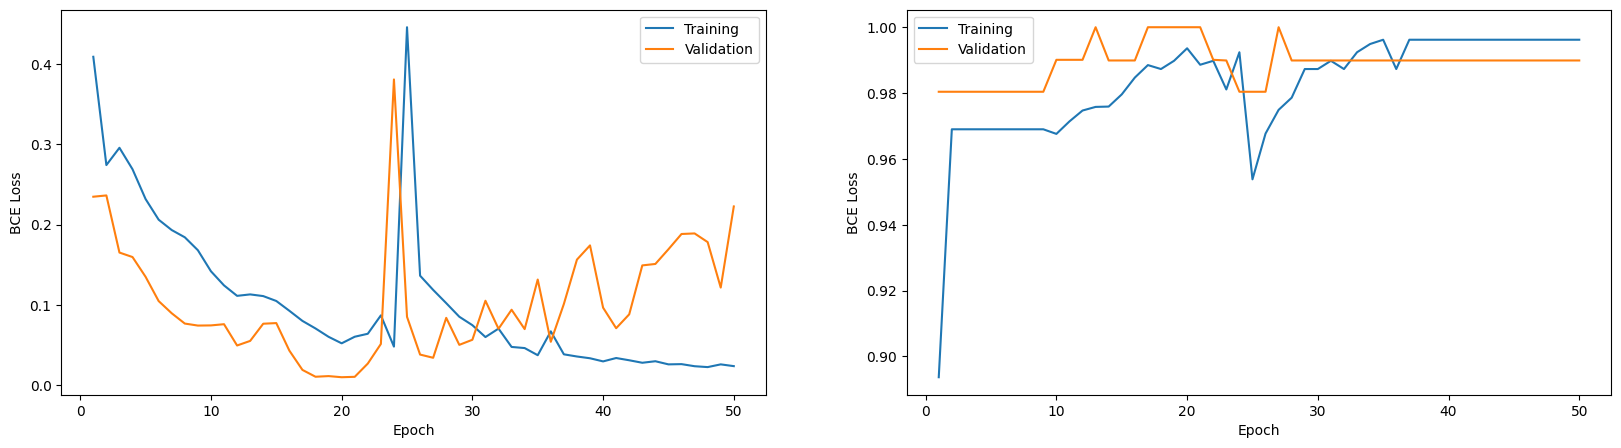

In [ ]:
# View training & validation loss over time.
log_df = pd.read_csv("./logs/log.csv")

fig, ax = plt.subplots(figsize=(20,5), ncols=2, nrows=1)
ax[0].plot(log_df["epoch"], log_df["trn_loss"], label="Training")
ax[0].plot(log_df["epoch"], log_df["val_loss"], label="Validation")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("BCE Loss")
ax[0].legend()

ax[1].plot(log_df["epoch"], log_df["trn_f1"], label="Training")
ax[1].plot(log_df["epoch"], log_df["val_f1"], label="Validation")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("BCE Loss")
ax[1].legend()

=== TEST SUMMARY ===

bce loss: 0.0101

precision: 1.0000 | recall: 1.0000 | f1: 1.0000

accuracy: 1.0000

counts: TP=50 TN=2 FP=0 FN=0 N=52